In [1]:
#libraries for data analysis
import pandas as pd
import numpy as np
#libraries for normality tests
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

In [2]:
#import the User Datasets
xls = pd.ExcelFile('Gender_Bounce.xlsx')
Female = pd.read_excel(xls, 'Female')
Male = pd.read_excel(xls, 'Male')

In [3]:
#Remove the dates for ease
Female = Female['Bounce Rate']
Male = Male['Bounce Rate']

In [4]:
#convert datasets into arrays
Female = Female.values
Male = Male.values

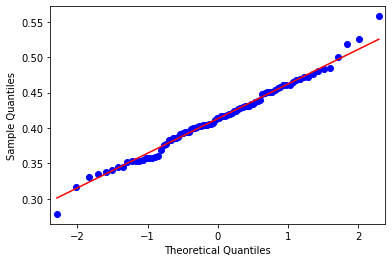

In [5]:
#plot both datasets using qqplot to check for normality
qqplot(Female, line='s')
pyplot.show()

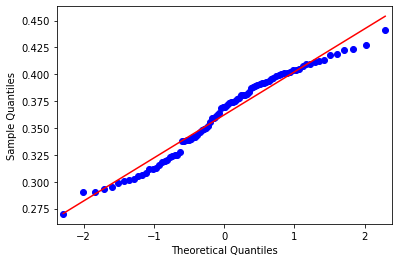

In [6]:
qqplot(Male, line='s')
pyplot.show()

### Not all datasets look normal since most fall off the qq plot

In [7]:
names = ["Female", "Male"]
for index, i in enumerate((Female, Male)):
    stat, p = shapiro(i)
    print(names[index])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Female
Statistics=0.992, p=0.893
Sample looks Gaussian (fail to reject H0)
Male
Statistics=0.965, p=0.015
Sample does not look Gaussian (reject H0)


### Since not both datasets are normaly distributed non-parametric tests should be used.

In [8]:
#import ranksums (Wilcoxon-Mann-Whitney (WMW) rank sum test) to test wether the difference between the two datasets is significant
from scipy.stats import ranksums

In [9]:
stat, p =  ranksums(Female,Male)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('The difference between the two datasets is not significant (fail to reject H0)')
else:
	print('The difference between the two datasets is significant (reject H0)')

Statistics=6.679, p=0.000
The difference between the two datasets is significant (reject H0)


## We conclude that there is significant difference between the two datasets